WELCOME!

New york is home to one of the highest pedestrian populations- and when you walk so much, you surely want to sit down for a little rest too!
In this document, we take you through the 'Behind the scenes' of ranking NYC public benches with essential amenities around, so that you know the best ones to go for stretching a leg.

We begin with importing the most important packages in python for the purpose of our ranking. This includes Pandas, Seaborn as well as sci-kit criteria.
Here is a little information about each of these packages:
pandas is a Python package which aims to be the fundamental high-level building block for doing practical, real-world data analysis in Python. Additionally, it has the broader goal of becoming the most powerful and flexible open source data analysis/manipulation tool available in any language. 

pandas is well suited for many different kinds of data:
- Tabular data with heterogeneously-typed columns, as in an SQL table or Excel spreadsheet
- Ordered and unordered (not necessarily fixed-frequency) time series data.
- Arbitrary matrix data (homogeneously typed or heterogeneous) with row and column labels
- Any other form of observational / statistical data sets. The data need not be labeled at all to be placed into a pandas data structure

The two primary data structures of pandas, Series (1-dimensional) and DataFrame (2-dimensional).

Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

Scikit Critera is a collection of Multiple-criteria decision analysis (MCDA) methods integrated into scientific python stack. Is Open source and commercially usable.


#https://readthedocs.org/projects/scikit-criteria/downloads/pdf/latest/


In [3]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import minmax_scale
%matplotlib inline
!pip install -U scikit-criteria
from skcriteria import Data, MIN, MAX

Processing /Users/vidyamadhavan/Library/Caches/pip/wheels/a0/07/ff/b06486324dd8b0da731abd1a97d24b416881bfe46bc8868f4c/scikit_criteria-0.2.10-py3-none-any.whl
  Using cached PuLP-2.4-py3-none-any.whl (40.6 MB)
  Using cached tabulate-0.8.9-py3-none-any.whl (25 kB)
  Using cached json_tricks-3.15.5-py2.py3-none-any.whl (26 kB)
  Using cached amply-0.1.4-py3-none-any.whl (16 kB)


In [85]:
data_frame = pd.read_csv(r'/Users/vidyamadhavan/Desktop/city_bench_crime_fountains_last.csv')

In [86]:
data_frame.head()

,Bench ID,Crime distance (max),Waterfountain dist (min),subway_dist,wifi_dist,walkways_dist
0,1,3090.798030,217.797076,2280.601083,2243.747263,45.452654
1,2,1800.844031,774.454725,73.980456,62.676372,29.235593
2,3,4782.849317,253.646874,181.049387,146.794709,1419.415133
3,4,7030.530045,113.295868,119.639633,31.291434,206.888881
4,5,7139.016334,133.851445,293.083180,3341.733155,1254.343303


##Generic methodology##

Most of the basic multi-criteria decision solvers have a common methodology which tries to consider one attribute at a time and try to maximize or minimize it (as per the requirement) to generate optimized score.
Introduce weights to each attributes to get optimized weighted scores.
Combine the weighted scores (of each attribute) to create a final score for an entity (here car).
After this, we have transformed the requirements into a single numerical attribute (final score), and as done previously we can sort on this to get the best car (this time we sort by descending as we want to pick one with maximum score). Let’s explore each step with examples.

Maximize and Minimize
Remember the first point from the dataset section, attributes have very different units and distributions, which we need to handle. One possible solution is to normalize each attribute between the same range. And we also want the direction of goodness to be similar (irrespective of the logic). Hence after normalization, values near maximum of range (say 1) should mean that bench is good in that attribute and lower values (say near 0) means they are bad. 
For the attributes that we have, we want to minimise the distance of the bench from our NYC walkway signs, Wifi hotspots, drinking water fountains ands subway stations, while we would maximise the distance from a gun-shooting crime scenes.

In [87]:
criteria_data = Data(
    data_frame.iloc[:, 1:],          # the pandas dataframe
    [MAX, MIN, MIN, MIN, MIN],      # direction of goodness for each column
    anames = data_frame['Bench ID'], # each entity's name, here car name
    cnames = data_frame.columns[1:], # attribute/column name
    # weights=[1,1]           # weights for each attribute (optional)
    )
criteria_data

ALT./CRIT.,Crime distance (max) (max),Waterfountain dist (min) (min),subway_dist (min),wifi_dist (min),walkways_dist (min)
1,3090.8,217.797,2280.6,2243.75,45.4527
2,1800.84,774.455,73.9805,62.6764,29.2356
3,4782.85,253.647,181.049,146.795,1419.42
4,7030.53,113.296,119.64,31.2914,206.889
5,7139.02,133.851,293.083,3341.73,1254.34
6,1247.33,360.381,254.2,185.711,62.5098
7,1885.88,299.614,349.16,145.732,72.9453
8,6949.19,431.431,262.961,11.4812,309.582
9,2432.91,90.0795,5659.53,6578.45,10.2357
10,2694.85,161.827,58.8151,194.444,103.991


We use a 'Violin plot' to show plot out our various attribute-distances.
A violin plot is a method of plotting numeric data. It is similar to a box plot, with the addition of a rotated kernel density plot on each side.
Violin plots are similar to box plots, except that they also show the probability density of the data at different values, usually smoothed by a kernel density estimator. Typically a violin plot will include all the data that is in a box plot: a marker for the median of the data; a box or marker indicating the interquartile range; and possibly all sample points, if the number of samples is not too high.

<AxesSubplot:>

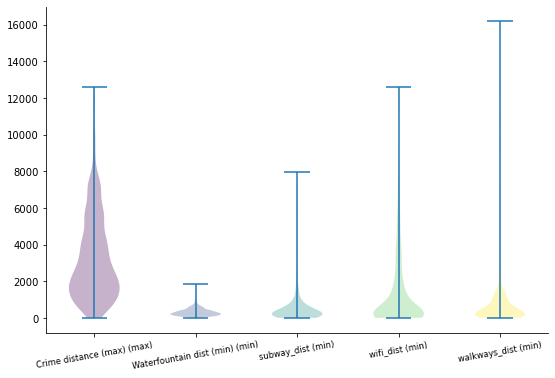

In [88]:
criteria_data.plot("violin")

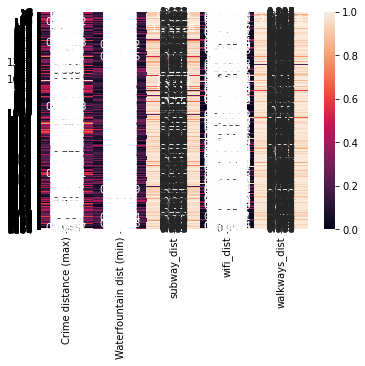

In [90]:
def normalize_data(logic="minmax"):
    dataframe = data_frame.iloc[:, 1:].values.copy()
    if logic == "minmax":
        normalized_data = minmax_scale(dataframe)
        normalized_data[:, 2] = 1 - normalized_data[:, 2]
        normalized_data[:, 4] = 1 - normalized_data[:, 4]
    elif logic == "sumNorm":
        normalized_data = dataframe / dataframe.sum(axis=0)
        normalized_data[:, 2] = 1 / normalized_data[:, 2]
        normalized_data[:, 4] = 1 / normalized_data[:, 4]
    elif logic == "maxNorm":
        normalized_data = dataframe / dataframe.max(axis=0)
        normalized_data[:, 2] = 1 / normalized_data[:, 2]
        normalized_data[:, 4] = 1 / normalized_data[:, 4]
    return normalized_data

def plot_heatmap(logic="minmax"):
  plot_data = normalize_data(logic)
  Bench_IDs = data_frame['Bench ID']
  attribute_names = data_frame.columns[1:]
  sns.heatmap(plot_data, annot=True, yticklabels = Bench_IDs, xticklabels = attribute_names, fmt='.3g')

plot_heatmap("minmax")

In [99]:
from skcriteria.madm import simple
# weighted sum
dm = simple.WeightedSum(mnorm="sum")
dec = dm.decide(criteria_data)
dec

ALT./CRIT.,Crime distance (max) (max),Waterfountain dist (min) (min),subway_dist (min),wifi_dist (min),walkways_dist (min),Rank
1,3090.8,217.797,2280.6,2243.75,45.4527,946
2,1800.84,774.455,73.9805,62.6764,29.2356,294
3,4782.85,253.647,181.049,146.795,1419.42,1073
4,7030.53,113.296,119.64,31.2914,206.889,286
5,7139.02,133.851,293.083,3341.73,1254.34,1777
6,1247.33,360.381,254.2,185.711,62.5098,811
7,1885.88,299.614,349.16,145.732,72.9453,810
8,6949.19,431.431,262.961,11.4812,309.582,47
9,2432.91,90.0795,5659.53,6578.45,10.2357,196
10,2694.85,161.827,58.8151,194.444,103.991,715


In [92]:
# export the final scores
dec.e_.points

array([ 39386.18276504, 122452.33580405,  32688.88199613, ...,
        81354.44151607,   6204.81516712,  77091.19230258])

Next, we are using the skcriteria.madm package.

This package contains several implementations of Multi criteria decision analysys methods (MADM) methods.
Conflicting criteria are typical in evaluating options: for example, in portfolio management, we are interested in getting high returns but at the same time reducing our risks, but the stocks that have the potential of bringing high returns typically also carry high risks of losing money. In a service industry, customer satisfaction and the cost of providing service are fundamental conflicting criteria. For this purpose, we have distances which are of conflicting nature, where we want certain attributes to be closer than others to our bench. Hence we can use this package to compare these attributes and rank them together.

In [93]:
from skcriteria.madm import simple

# make a copy of original dataset
data_frame_copy = data_frame.copy()

# weighted sum, sumNorm
dm = simple.WeightedSum(mnorm="sum")
dec = dm.decide(criteria_data)
data_frame_copy.loc[:, 'rank_weightedSum_sumNorm_inverse'] = dec.rank_

# weighted sum, maxNorm
dm = simple.WeightedSum(mnorm="max")
dec = dm.decide(criteria_data)
data_frame_copy.loc[:, 'rank_weightedSum_maxNorm_inverse'] = dec.rank_

# weighted product, sumNorm
dm = simple.WeightedProduct(mnorm="sum")
dec = dm.decide(criteria_data)
data_frame_copy.loc[:, 'rank_weightedProduct_sumNorm_inverse'] = dec.rank_

# weighted product, sumNorm
dm = simple.WeightedProduct(mnorm="max")
dec = dm.decide(criteria_data)
data_frame_copy.loc[:, 'rank_weightedProduct_maxNorm_inverse'] = dec.rank_

# min max scale + mirror
data_frame_copy.loc[:, 'rank_weightedSum_minmaxScale_subtract'] =\
     pd.Series(normalize_data().sum(axis=1)).rank(ascending=False).astype(int)

# sort for better visualization
data_frame_copy.sort_values(by=['rank_weightedSum_sumNorm_inverse'], inplace=True)

In [94]:
import plotly.graph_objects as go
import pandas as pd

fig = go.Figure(data=
    go.Parcoords(
        dimensions = list([
            dict(label = 'Bench ID', range=[1, 10], 
                 tickvals = list(range(1, 11)),
                 values = list(range(1, 11)),
                 ticktext = data_frame_copy['Bench ID']),
            dict(label = 'WeightedSum(sum)', values = data_frame_copy['rank_weightedSum_sumNorm_inverse']),
            dict(label = 'WeightedSum(max)', values = data_frame_copy['rank_weightedSum_maxNorm_inverse']),
            dict(label = 'WeightedProduct(sum)', values = data_frame_copy['rank_weightedProduct_sumNorm_inverse']),
            dict(label = 'WeightedProduct(max)', values = data_frame_copy['rank_weightedProduct_maxNorm_inverse']),
            dict(label = 'MinMax_subtract', values = data_frame_copy['rank_weightedSum_minmaxScale_subtract']),

        ])
    )
)

fig.update_layout(
    plot_bgcolor = 'white',
    paper_bgcolor = 'white'
)

fig.show()

From the above comparison along different mathematical tests, we can see that Bench ID 1779 turns out to be top ranked across NYC along 4 of the 5 tests. We explore the reason for this in the next part, after our individual heatmaps from the results. Please note that the heat map is clustered due to the very large number of ID variable = Bench IDs (2164 observations).

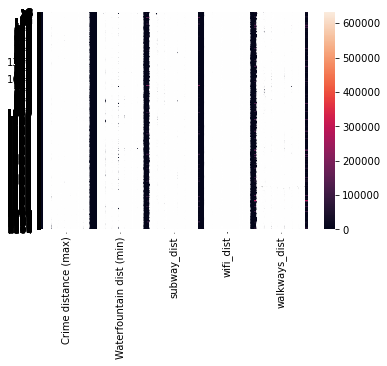

In [95]:
plot_heatmap("sumNorm")

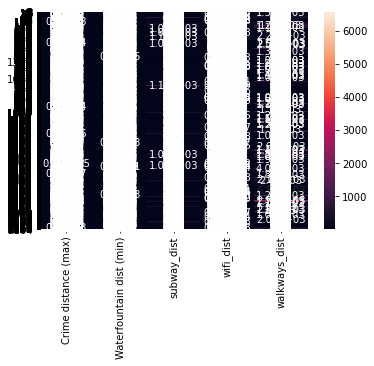

In [96]:
plot_heatmap("maxNorm")

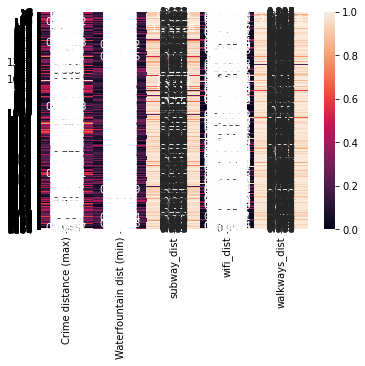

In [97]:
plot_heatmap("minmax")

The main reason behind the variance of result when changing the normalization (from sum to max) is due to the translation done on the original data. This translation changes the range of data (like scales everything between x and y ) and in case of inverse modifies the linearity as well (say, equal steps of 1 in original data is not consistent in transformed data). This will become more clear by following result,

In [98]:
import numpy as np
x = np.array(range(1, 10))
print("X: ", x)
print("MinMax: ", minmax_scale(x))
print("MinMax_subtract: ", 1 - minmax_scale(x))
print("sumNorm: ", x/sum(x))
print("sumNorm_inverse: ", (1/(x/sum(x))))
print("maxNorm: ", x/max(x))
print("maxNorm_inverse: ", 1/(x/max(x)))

X:  [1 2 3 4 5 6 7 8 9]
MinMax:  [0.    0.125 0.25  0.375 0.5   0.625 0.75  0.875 1.   ]
MinMax_subtract:  [1.    0.875 0.75  0.625 0.5   0.375 0.25  0.125 0.   ]
sumNorm:  [0.02222222 0.04444444 0.06666667 0.08888889 0.11111111 0.13333333
 0.15555556 0.17777778 0.2       ]
sumNorm_inverse:  [45.         22.5        15.         11.25        9.          7.5
  6.42857143  5.625       5.        ]
maxNorm:  [0.11111111 0.22222222 0.33333333 0.44444444 0.55555556 0.66666667
 0.77777778 0.88888889 1.        ]
maxNorm_inverse:  [9.         4.5        3.         2.25       1.8        1.5
 1.28571429 1.125      1.        ]


Since this is a ranking project, we have not checked for correlation between any of the attributes as they are independent amenities without links to one-another. We felt that further analysis along those lines could misrepresent any incidental relations which occured between the attributes.

As a further application of this function, we can include the original dataset with lat/long locations (which were cleaned out of this dataset for the purpose of easy computation on a home computer), so that once a Bench ID is located, we can extract the lat/long location as part of the output. Additionally, we hope to one day build an input function which will allow users to input their borough/micro-location and output relevant results.

We thank you for this opportunity and hope you enjoyed our project as much as we did!

Warm regards,
Tala Berro
Cindy Setiadi
Paolo Rivas
Vidya Madhavan